In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

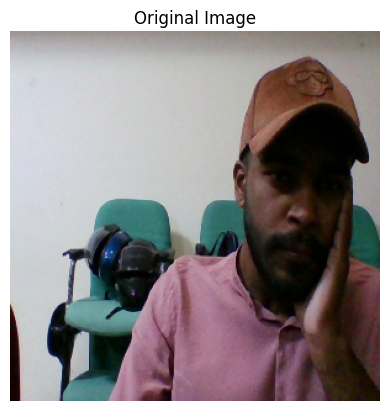

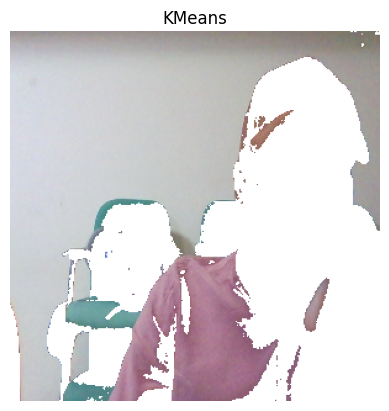

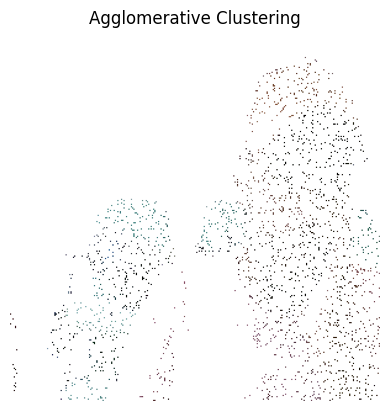

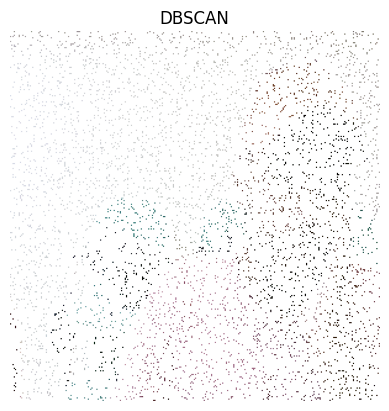

In [4]:
import cv2
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    raise ValueError("Webcam capture failed")

img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (300, 300))
h, w, c = img.shape
pixels = img.reshape(-1, 3)

# Original Image
plt.imshow(img)
plt.title('Original Image')
plt.axis("off")
plt.show()

# kmeans
kmeans = KMeans(n_clusters=2, random_state=0)
labels_kmeans = kmeans.fit_predict(pixels)
seg_kmeans = np.copy(pixels)
seg_kmeans[labels_kmeans == 0] = [255, 255, 255]
seg_kmeans = seg_kmeans.reshape(h, w, c)

# KMeans result
plt.imshow(seg_kmeans)
plt.title('KMeans')
plt.axis("off")
plt.show()


# For agglomerative and DBSCAN, sample 5000 pixels to speed up
sample_size = 5000
if len(pixels) > sample_size:
    idx = np.random.choice(len(pixels), sample_size, replace=False)
    pixels_sample = pixels[idx]
else:
    pixels_sample = pixels
    idx = np.arange(len(pixels))

# agglomerative clustering on sample
agg = AgglomerativeClustering(n_clusters=2)
labels_agg_sample = agg.fit_predict(pixels_sample)

# create full labels array, initialize all to one cluster (e.g. 1)
labels_agg_full = np.ones(len(pixels), dtype=int) * -1
# assign sample labels back
labels_agg_full[idx] = labels_agg_sample

seg_agg = np.copy(pixels)
# For pixels without label (-1), assign white
seg_agg[labels_agg_full == 0] = [255, 255, 255]
seg_agg[labels_agg_full == -1] = [255, 255, 255]
seg_agg = seg_agg.reshape(h, w, c)

# Agglomerative Clustering result
plt.imshow(seg_agg)
plt.title('Agglomerative Clustering')
plt.axis("off")
plt.show()


# DBSCAN on sample
dbscan = DBSCAN(eps=10, min_samples=10)
labels_dbscan_sample = dbscan.fit_predict(pixels_sample)

labels_dbscan_full = np.ones(len(pixels), dtype=int) * -1
labels_dbscan_full[idx] = labels_dbscan_sample

seg_dbscan = np.copy(pixels)
seg_dbscan[labels_dbscan_full == -1] = [255, 255, 255]
seg_dbscan = seg_dbscan.reshape(h, w, c)

# DBSCAN result
plt.imshow(seg_dbscan)
plt.title('DBSCAN')
plt.axis("off")
plt.show()
